In [42]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [43]:
# carregando dados
df = pd.read_csv("../data/housing.csv", sep=',', encoding='utf-8')

In [44]:
# check 
df.head(3)

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0

In [45]:
# check
df.shape

(489, 4)

## variaveis

In [46]:
# dependente e preditoras

X = df.iloc[:,0:3].values 
X_RM = df.iloc[:,0:1].values # numero de comodos
X_LSTAT = df.iloc[:,1:2].values # classe social

y = df.iloc[:,3].values # dependente

## Regressão em função do número de cômodos

In [47]:
# bases treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X_RM, y, test_size = 0.3, random_state=10)

In [48]:
# check shape
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [49]:
# check shape
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [50]:
# regressor simples
reg_linear = LinearRegression()
reg_linear.fit(x_treino, y_treino)

LinearRegression()

In [51]:
# coeficiente linear
reg_linear.intercept_

-626510.2699464143

In [52]:
# coeficiente angular
reg_linear.coef_

array([173771.45170999])

In [53]:
# coeficiente de determinação dados de treino 
# esse coeficiente explica o modelo
reg_linear.score(x_treino, y_treino)

0.46368351515551953

In [54]:
# coeficiente de determinação (R²)
reg_linear.score(x_teste, y_teste)

0.5426573915930195

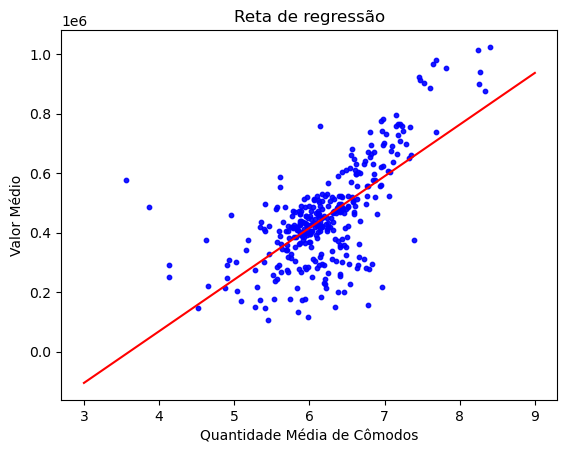

In [55]:
# plot treino
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(3, 9)
plt.plot(X_plot, X_plot*reg_linear.coef_ + reg_linear.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade Média de Cômodos')
plt.show()

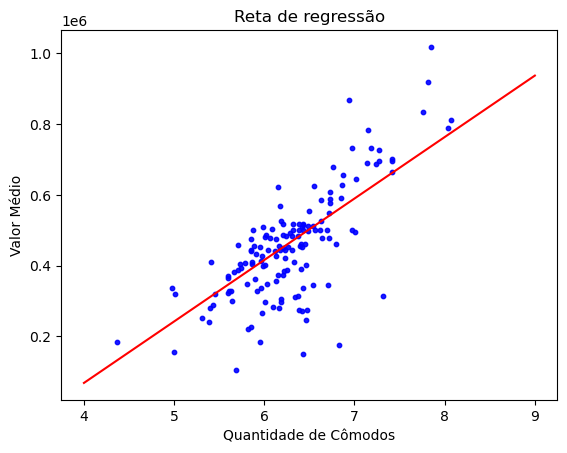

In [56]:
# plot teste
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(4, 9)
plt.plot(X_plot, X_plot*reg_linear.coef_ + reg_linear.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Cômodos')
plt.show()

In [57]:
# check modelo com valores distintos de cômodos
for i in range(3):
    comodos = np.random.randint(1,15)
    print(f'Comodos: {comodos} - Previsão: {reg_linear.predict([[comodos]])}')

Comodos: 9 - Previsão: [937432.79544351]
Comodos: 9 - Previsão: [937432.79544351]
Comodos: 12 - Previsão: [1458747.15057348]


In [58]:
# previsoes
y_pred = reg_linear.predict(x_teste)

In [59]:
# erro medio absoluto - MAE
mean_absolute_error(y_teste, y_pred)

76063.99733079868

In [60]:
# erro quadratico - MSE
mean_squared_error(y_teste, y_pred)

11294624525.740473

In [61]:
# raiz do erro quadrático - RSME
np.sqrt(mean_squared_error(y_teste, y_pred))

106276.17101561607

In [62]:
# validacao cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=5) 
modelo = LinearRegression()
result = cross_val_score(modelo,X_RM,y,cv=kfold)

print("Coef. determinação Médio: %.2f%%" % (result.mean() * 100.0))

Coef. determinação Médio: 47.77%


## Regressão em função da classe social

In [63]:
# separando bases
x_treino, x_teste, y_treino, y_teste = train_test_split(X_LSTAT, y, test_size=0.3, random_state=10)

In [64]:
# check
print(x_treino.shape, y_treino.shape)
print(x_teste.shape, y_teste.shape)

(342, 1) (342,)
(147, 1) (147,)


In [65]:
# modelo
reg_linear_social = LinearRegression()
reg_linear_social.fit(x_treino, y_treino)

LinearRegression()

In [66]:
# coef linear
reg_linear_social.intercept_

681977.7451055486

In [67]:
# coef angular
reg_linear_social.coef_

array([-17263.75010515])

In [68]:
# coef determinacao R² treino
reg_linear_social.score(x_treino, y_treino)

0.5688289563355992

In [69]:
# coef determinicao R²
reg_linear_social.score(x_teste, y_teste)

0.6006038196307664

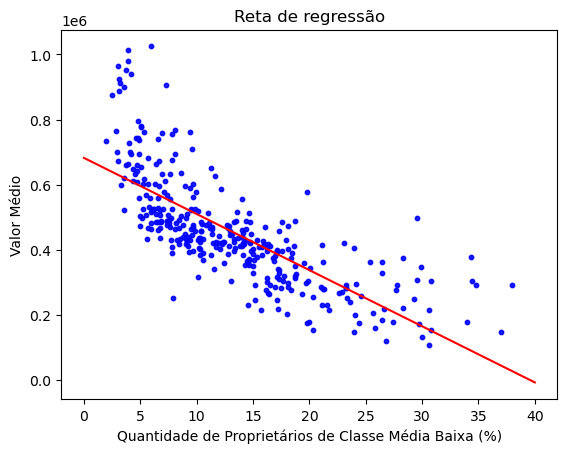

In [70]:
# plot treino
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*reg_linear_social.coef_ + reg_linear_social.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

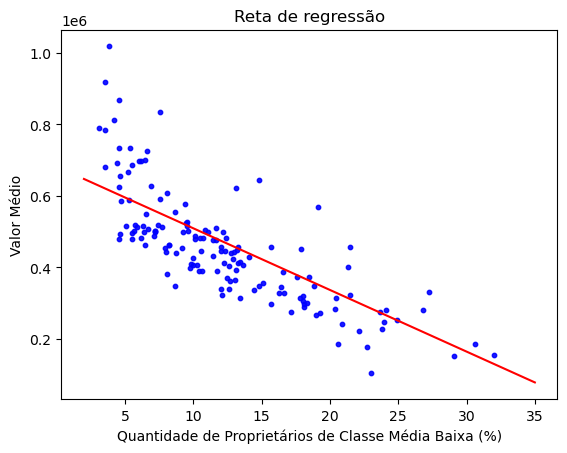

In [71]:
# plot teste
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(2, 35)
plt.plot(X_plot, X_plot*reg_linear_social.coef_ + reg_linear_social.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [72]:
# check modelo com valores distintos de % classe social
for i in range(3):
    comodos = np.random.randint(20,55)
    print(f'Classe baixa: {comodos}% - Previsão: {reg_linear.predict([[comodos]])}')

Classe baixa: 51% - Previsão: [8235833.76726313]
Classe baixa: 35% - Previsão: [5455490.53990327]
Classe baixa: 51% - Previsão: [8235833.76726313]


In [73]:
# previsoes
y_pred = reg_linear_social.predict(x_teste)

In [74]:
# erro medio absoluto MAE
mean_absolute_error(y_teste, y_pred)

76340.55192245143

In [75]:
# erro quadratico MSE
mean_squared_error(y_teste, y_pred)

9863567949.634666

In [76]:
# raiz erro quadrático RMSE
np.sqrt(mean_squared_error(y_teste, y_pred))

99315.49702657016

In [77]:
# validacao cruzada
kfold = KFold(n_splits=15, shuffle=True, random_state=5) 
modelo = LinearRegression()
result = cross_val_score(modelo,X_LSTAT,y,cv=kfold)

print("Coef. determinação Médio: %.2f%%" % (result.mean() * 100.0))

Coef. determinação Médio: 55.97%


## Regressão múltipla

In [78]:
# separando bases de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3, random_state=10)

In [79]:
# check
print(x_treino.shape, y_treino.shape)
print(x_teste.shape, y_teste.shape)

(342, 3) (342,)
(147, 3) (147,)


In [80]:
# modelo
reg_multipla = LinearRegression()
reg_multipla.fit(x_treino, y_treino)

LinearRegression()

In [81]:
# previsoes
y_pred = reg_multipla.predict(x_teste)

In [82]:
# coeficiente linear
reg_multipla.intercept_

492208.9642086035

In [83]:
# coeficiente angular
reg_multipla.coef_

array([ 77530.04174416, -10700.88084667, -20397.20159349])

In [170]:
# coeficiente de determinação (R²)
reg_multipla.score(x_treino, y_treino), reg_multipla.score(x_teste, y_teste)

(0.7323892317068013, 0.6783181211533296)

In [85]:
# MAE
mean_absolute_error(y_teste, y_pred)

59294.98521630864

In [86]:
# SME
mean_squared_error(y_teste, y_pred)

6124867841.0660515

In [87]:
# RSME
np.sqrt(mean_squared_error(y_teste, y_pred))

78261.5348754805

In [88]:
# previsão com valor distinto
reg_multipla.predict([[8,10,5]])

array([903454.48172774])

In [89]:
# validacao cruzada
kfold = KFold(n_splits=15, shuffle=True, random_state=5) 
modelo = LinearRegression()
result = cross_val_score(modelo,X,y,cv=kfold)

print("Coef. determinação Médio: %.2f%%" % (result.mean() * 100.0))

Coef. determinação Médio: 69.25%


## Regressão polinomial

In [90]:
# separação base treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X_RM, y, test_size=0.3, random_state=10)

In [91]:
# pre processamento
grau_polinomial = PolynomialFeatures(degree=2)
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly_teste = grau_polinomial.fit_transform(x_teste)

In [92]:
# check
x_poly

array([[ 1.      ,  6.781   , 45.981961],
       [ 1.      ,  6.301   , 39.702601],
       [ 1.      ,  7.333   , 53.772889],
       ...,
       [ 1.      ,  6.593   , 43.467649],
       [ 1.      ,  5.986   , 35.832196],
       [ 1.      ,  6.854   , 46.977316]])

In [93]:
# check shape
print(x_treino.shape, y_treino.shape)
print(x_teste.shape, y_teste.shape)

(342, 1) (342,)
(147, 1) (147,)


In [94]:
# modelo
reg_polinomial = LinearRegression()
reg_polinomial.fit(x_poly, y_treino)

LinearRegression()

In [95]:
# previsoes
y_pred = reg_polinomial.predict(x_poly_teste)

In [96]:
# coeficiente linear
reg_polinomial.intercept_

1792479.3795213897

In [97]:
# coeficiente angular
reg_polinomial.coef_

array([      0.        , -612855.9853993 ,   63229.97001796])

In [169]:
# coeficiente de determinação R²
reg_polinomial.score(x_poly, y_treino), reg_polinomial.score(x_poly_teste, y_teste)

(-0.6466695432565126, -0.5996687948624873)

In [99]:
# MAE
mean_absolute_error(y_teste, y_pred)

76354.62112581241

In [100]:
# SME
mean_squared_error(y_teste, y_pred)

10537450723.947723

In [101]:
# RSME
np.sqrt(mean_squared_error(y_teste, y_pred))

102652.08582365837

In [102]:
# previsões de valores distintos
x_valor = 6
x_novo = np.array([[x_valor]])
x_novo_poly = grau_polinomial.transform(x_novo)
y_pred_novo = reg_polinomial.predict(x_novo_poly)

print("Previsão para x = {}: {}".format(x_valor, y_pred_novo))

Previsão para x = 6: [391622.38777217]


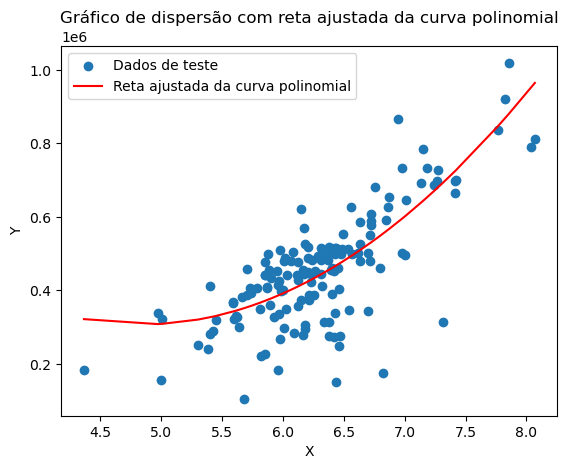

In [103]:
# plot da reta ajustada da curva polinomial
plt.scatter(x_teste, y_teste, label='Dados de teste')
x_poly_teste_sort = np.sort(x_poly_teste, axis=0)
y_pred_sort = reg_polinomial.predict(x_poly_teste_sort)
plt.plot(x_poly_teste_sort[:, 1], y_pred_sort, label='Reta ajustada da curva polinomial', color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dispersão com reta ajustada da curva polinomial')
plt.legend()
plt.show()

## Regressão por vetores de suporte

In [104]:
# separação de bases de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3, random_state=10)

In [105]:
# check shape
print(x_treino.shape, y_treino.shape)
print(x_teste.shape, y_teste.shape)

(342, 3) (342,)
(147, 3) (147,)


In [106]:
# escalonamento para svm
scaler = StandardScaler()
x_treino_scaler = scaler.fit_transform(x_treino)
x_teste_scaler = scaler.fit_transform(x_teste)
y_treino_scaler = scaler.fit_transform(y_treino.reshape(-1,1)) # reshape para retornar matriz 2D
y_teste_scaler = scaler.fit_transform(y_teste.reshape(-1,1)) # reshape para retornar matriz 2D

In [107]:
# modelo
svr = SVR()
svr.fit(x_treino_scaler, y_treino_scaler.ravel()) # ravel para retornar matriz 1D

SVR()

In [108]:
# previsoes
y_pred = svr.predict(x_teste_scaler)

In [164]:
# coeficiente de determinação R²
svr.score(x_treino_scaler, y_treino_scaler), svr.score(x_teste_scaler, y_teste_scaler)

(0.861823697628271, 0.828042904988858)

In [110]:
# revertendo escalonamento
y_teste_inverso = scaler.inverse_transform(y_teste_scaler)
y_pred_inverso = scaler.inverse_transform(y_pred.reshape(-1,1)) # reshape para retornar matriz 2D

In [111]:
# erro absoluto medio MAE
mean_absolute_error(y_teste_inverso, y_pred_inverso)

48813.747744244734

In [112]:
# erro quadratico medio MSE
mean_squared_error(y_teste_inverso, y_pred_inverso)

4246686809.814163

In [113]:
# raiz do erro quadratico medio RSME
np.sqrt(mean_squared_error(y_teste_inverso, y_pred_inverso))

65166.6080889144

In [114]:
# validação cruzada

X_scaler = scaler.fit_transform(X) # escalonamento para modelo
y_scaler = scaler.fit_transform(y.reshape(-1,1)) # escalonamento para modelo e reshape para matriz 2D

kfold = KFold(n_splits=15, shuffle=True, random_state=5) # separa os dados
modelo = LinearRegression()

result = cross_val_score(modelo,X_scaler,y_scaler.ravel(),cv=kfold) # ravel para retornar matriz 1D

print("Coef. determinação Médio: %.2f%%" % (result.mean() * 100.0))

Coef. determinação Médio: 69.25%


## Regressão com decision tree

In [115]:
# separação de bases treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [116]:
# check shapes
print(x_treino.shape, y_treino.shape)
print(x_teste.shape, y_teste.shape)

(342, 3) (342,)
(147, 3) (147,)


In [117]:
# modelo
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=10)
reg_tree.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [118]:
# coeficientes de determinição R² - treino e teste
reg_tree.score(x_treino, y_treino), reg_tree.score(x_teste, y_teste)

(0.9050951127606555, 0.8256951550328737)

In [119]:
# previsoes
y_pred = reg_tree.predict(x_teste)

In [120]:
# erro absoluto medio MAE
mean_absolute_error(y_teste, y_pred)

52954.00426293284

In [121]:
# erro quadratico medio MSE
mean_squared_error(y_teste, y_pred)

5057266756.343771

In [122]:
# raiz do erro quadratico medio RSME
np.sqrt(mean_squared_error(y_teste, y_pred))

71114.46235713077

In [123]:
# validacao cruzada
kfold = KFold(n_splits=15, shuffle=True, random_state=5) 
result = cross_val_score(reg_tree,X,y,cv=kfold)

print("Coef. determinação Médio: %.2f%%" % (result.mean() * 100.0))

Coef. determinação Médio: 74.60%


## Regressão com Random Forest

In [124]:
# separação de bases de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [125]:
# check shapes
x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape

((342, 3), (147, 3), (342,), (147,))

In [126]:
# modelo
reg_randomForest = RandomForestRegressor(n_estimators=60, 
                                         criterion='squared_error', 
                                         max_depth=5, 
                                         random_state=10)
reg_randomForest.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=60, random_state=10)

In [127]:
# coeficientes de determinação R² - treino/teste
reg_randomForest.score(x_treino, y_treino), reg_randomForest.score(x_teste, y_teste)

(0.9160346630571496, 0.8465287311346861)

In [128]:
# previsoes
y_prev = reg_randomForest.predict(x_teste)

In [129]:
# erro absoluto medio MAE
mean_absolute_error(y_teste, y_prev)

49730.29595322481

In [130]:
# erro quadratico medio MSE
mean_squared_error(y_teste, y_prev)

4452803054.515374

In [131]:
# raiz do erro quadratico medio RMSE
np.sqrt(mean_squared_error(y_teste, y_prev))

66729.326795011

In [132]:
# validação cruzada
kfold = KFold(n_splits=15, shuffle=True, random_state=5) 
result = cross_val_score(reg_randomForest, X, y, cv=kfold)

print("Coef. determinação Médio: %.2f%%" % (result.mean() * 100.0))

Coef. determinação Médio: 82.85%


In [133]:
# importancia de cada variavel conforme o algoritmo
reg_randomForest.feature_importances_

array([0.45293379, 0.4930718 , 0.0539944 ])

## Regressão com xgboost

In [134]:
# separação de bases de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=10)

In [135]:
# check shapes
x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape

((342, 3), (147, 3), (342,), (147,))

In [136]:
# modelo
reg_xgboost = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective='reg:squarederror', random_state=10)
reg_xgboost.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=180, n_jobs=None,
             num_parallel_tree=None, random_state=10, ...)

In [137]:
# coeficientes de determinação R² - treino/teste
reg_xgboost.score(x_treino, y_treino), reg_xgboost.score(x_teste, y_teste)

(0.9268706650557607, 0.8355222474233648)

In [138]:
# previsoes
y_prev = reg_xgboost.predict(x_teste)

In [139]:
# metricas - MAE MSE RMSE
mean_absolute_error(y_teste, y_prev), mean_squared_error(y_teste, y_prev), np.sqrt(mean_squared_error(y_teste, y_prev))

(47811.114795918365, 4061975473.183099, 63733.62906019944)

In [140]:
# validacao cruzada
kfolds = KFold(n_splits=15, shuffle=True, random_state=5)
cross_val_score(reg_xgboost, X, y, cv=kfolds).mean()

0.8314637312555491

## Regressão com lightGBM

In [141]:
!pip install lightgbm

In [142]:
import lightgbm as lgb

In [143]:
# treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [144]:
# shapes
x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape

((342, 3), (342,), (147, 3), (147,))

In [145]:
# modelo
reg_lgbm = lgb.LGBMRegressor(n_estimators=50, 
                            num_leaves=50,
                            max_depth=3,
                            learning_rate=0.1,
                            random_state=10)
reg_lgbm.fit(x_treino, y_treino)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 266
[LightGBM] [Info] Number of data points in the train set: 342, number of used features: 3
[LightGBM] [Info] Start training from score 455325.438596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(max_depth=3, n_estimators=50, num_leaves=50, random_state=10)

In [146]:
# R² treino - teste
reg_lgbm.score(x_treino, y_treino), reg_lgbm.score(x_teste, y_teste)

(0.8814914688459106, 0.821790912114666)

In [147]:
# previsoes
y_prev = reg_lgbm.predict(x_teste)

In [148]:
# metricas MAE MSE RSME
mae = mean_absolute_error(y_teste, y_prev)
mse = mean_squared_error(y_teste, y_prev)
rsme = np.sqrt(mse)

mae,mse,rsme

(55114.09314449551, 5170544146.439645, 71906.49585704789)

In [149]:
# validacao cruzada
cross_val_score(reg_lgbm, X, y, 
                cv=KFold(n_splits=15, shuffle=True, random_state=5)
               ).mean()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 456, number of used features: 3
[LightGBM] [Info] Start training from score 454092.763158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

0.8237877555284155

## Regressão com catboost

In [150]:
!pip install catboost

In [151]:
from catboost.core import CatBoostRegressor

In [152]:
# treino - teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [153]:
# shapes
x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape

((342, 3), (342,), (147, 3), (147,))

In [154]:
# modelo
reg_catboost = CatBoostRegressor(iterations=100,
                                learning_rate=0.08,
                                depth=5,
                                random_state=10)
reg_catboost.fit(x_treino, y_treino)

0:	learn: 153885.2754929	total: 481us	remaining: 47.7ms
1:	learn: 145560.6000514	total: 794us	remaining: 38.9ms
2:	learn: 138225.8372427	total: 1ms	remaining: 32.4ms
3:	learn: 131355.6293814	total: 1.21ms	remaining: 29.1ms
4:	learn: 125170.2577020	total: 1.45ms	remaining: 27.5ms
5:	learn: 119550.2226179	total: 1.65ms	remaining: 25.8ms
6:	learn: 114409.0672213	total: 1.85ms	remaining: 24.6ms
7:	learn: 109536.2116181	total: 2.08ms	remaining: 24ms
8:	learn: 105434.3594366	total: 2.29ms	remaining: 23.2ms
9:	learn: 101243.2460951	total: 2.5ms	remaining: 22.5ms
10:	learn: 97472.9802508	total: 2.73ms	remaining: 22.1ms
11:	learn: 93927.2207626	total: 2.92ms	remaining: 21.4ms
12:	learn: 90880.1445218	total: 3.12ms	remaining: 20.9ms
13:	learn: 87832.0734456	total: 3.32ms	remaining: 20.4ms
14:	learn: 85013.5932920	total: 3.51ms	remaining: 19.9ms
15:	learn: 82307.6915610	total: 3.71ms	remaining: 19.5ms
16:	learn: 79857.8824898	total: 3.92ms	remaining: 19.2ms
17:	learn: 77586.4911189	total: 4.14ms	

In [155]:
# R2 treino - teste
reg_catboost.score(x_treino, y_treino), reg_catboost.score(x_teste, y_teste)

(0.8987749049972403, 0.8356524921108562)

In [156]:
# previsoes
y_prev = reg_catboost.predict(x_teste)

In [157]:
# metrica MAE MSE RMSE
mae = mean_absolute_error(y_teste, y_prev)
mse = mean_squared_error(y_teste, y_prev)
rmse = np.sqrt(mse)

mae, mse, rmse

(52043.380841851125, 4768365379.014369, 69053.3516855943)

In [158]:
# validacao cruzada
cross_val_score(reg_catboost, X, y, cv=KFold(n_splits=15,
                                            shuffle=True,
                                            random_state=5)
               ).mean()

0:	learn: 155861.3254260	total: 404us	remaining: 40.1ms
1:	learn: 147849.0945349	total: 900us	remaining: 44.1ms
2:	learn: 140069.3123604	total: 1.13ms	remaining: 36.6ms
3:	learn: 133080.9174182	total: 1.36ms	remaining: 32.7ms
4:	learn: 126572.2230376	total: 1.61ms	remaining: 30.5ms
5:	learn: 120763.6466926	total: 1.83ms	remaining: 28.7ms
6:	learn: 115744.0292487	total: 2.08ms	remaining: 27.6ms
7:	learn: 111101.5795724	total: 2.31ms	remaining: 26.5ms
8:	learn: 106622.3873670	total: 2.54ms	remaining: 25.7ms
9:	learn: 102647.6071008	total: 2.76ms	remaining: 24.8ms
10:	learn: 98811.0949782	total: 2.99ms	remaining: 24.2ms
11:	learn: 95325.9824500	total: 3.2ms	remaining: 23.4ms
12:	learn: 92143.4946101	total: 3.4ms	remaining: 22.8ms
13:	learn: 89167.3773597	total: 3.61ms	remaining: 22.2ms
14:	learn: 86510.4687369	total: 3.83ms	remaining: 21.7ms
15:	learn: 84149.1642823	total: 4.04ms	remaining: 21.2ms
16:	learn: 81967.4747398	total: 4.28ms	remaining: 20.9ms
17:	learn: 80140.1505681	total: 4.5

0:	learn: 156852.0051877	total: 281us	remaining: 27.8ms
1:	learn: 148556.2140634	total: 592us	remaining: 29ms
2:	learn: 141304.4924801	total: 800us	remaining: 25.9ms
3:	learn: 133973.9202401	total: 1.03ms	remaining: 24.8ms
4:	learn: 127328.9914097	total: 1.25ms	remaining: 23.8ms
5:	learn: 121294.0361372	total: 1.47ms	remaining: 23.1ms
6:	learn: 115989.2576244	total: 1.7ms	remaining: 22.6ms
7:	learn: 111427.6080068	total: 1.93ms	remaining: 22.2ms
8:	learn: 106858.8668239	total: 2.17ms	remaining: 21.9ms
9:	learn: 102766.2358482	total: 2.37ms	remaining: 21.3ms
10:	learn: 98958.1271514	total: 2.57ms	remaining: 20.8ms
11:	learn: 94865.4848879	total: 2.78ms	remaining: 20.4ms
12:	learn: 91602.8427025	total: 2.99ms	remaining: 20ms
13:	learn: 88744.8384420	total: 3.19ms	remaining: 19.6ms
14:	learn: 85914.6741784	total: 3.39ms	remaining: 19.2ms
15:	learn: 83098.4610781	total: 3.59ms	remaining: 18.9ms
16:	learn: 80791.0388601	total: 3.8ms	remaining: 18.5ms
17:	learn: 78567.2830107	total: 4ms	rema

90:	learn: 56121.7793164	total: 24.6ms	remaining: 2.43ms
91:	learn: 56018.0257327	total: 25.3ms	remaining: 2.2ms
92:	learn: 55936.0311125	total: 25.5ms	remaining: 1.92ms
93:	learn: 55898.2823717	total: 25.8ms	remaining: 1.65ms
94:	learn: 55695.4713451	total: 26.1ms	remaining: 1.37ms
95:	learn: 55561.0498875	total: 26.4ms	remaining: 1.1ms
96:	learn: 55496.3767513	total: 26.7ms	remaining: 824us
97:	learn: 55396.4274299	total: 26.9ms	remaining: 548us
98:	learn: 55245.3472945	total: 27.2ms	remaining: 274us
99:	learn: 55190.1012086	total: 27.4ms	remaining: 0us
0:	learn: 155591.2436773	total: 302us	remaining: 29.9ms
1:	learn: 147610.2048935	total: 525us	remaining: 25.8ms
2:	learn: 140632.7117911	total: 763us	remaining: 24.7ms
3:	learn: 133557.2358622	total: 1.01ms	remaining: 24.3ms
4:	learn: 126848.7121012	total: 1.22ms	remaining: 23.3ms
5:	learn: 120925.2055138	total: 1.46ms	remaining: 22.9ms
6:	learn: 115548.3951814	total: 1.67ms	remaining: 22.2ms
7:	learn: 110570.9975177	total: 1.92ms	rem

6:	learn: 113535.9797640	total: 1.86ms	remaining: 24.7ms
7:	learn: 108829.0344152	total: 2.15ms	remaining: 24.8ms
8:	learn: 104490.9260072	total: 2.36ms	remaining: 23.9ms
9:	learn: 99996.5742266	total: 2.57ms	remaining: 23.1ms
10:	learn: 96176.9637522	total: 3.36ms	remaining: 27.2ms
11:	learn: 92609.2660998	total: 3.58ms	remaining: 26.3ms
12:	learn: 89742.3437687	total: 3.79ms	remaining: 25.4ms
13:	learn: 86870.0795577	total: 3.99ms	remaining: 24.5ms
14:	learn: 84173.1735761	total: 4.2ms	remaining: 23.8ms
15:	learn: 81481.8509005	total: 4.39ms	remaining: 23.1ms
16:	learn: 79170.4359737	total: 4.61ms	remaining: 22.5ms
17:	learn: 76861.8199919	total: 4.81ms	remaining: 21.9ms
18:	learn: 75070.5863088	total: 5.01ms	remaining: 21.4ms
19:	learn: 73402.9632288	total: 5.22ms	remaining: 20.9ms
20:	learn: 71941.0604725	total: 5.44ms	remaining: 20.5ms
21:	learn: 70611.8279134	total: 5.63ms	remaining: 20ms
22:	learn: 69267.5440749	total: 5.83ms	remaining: 19.5ms
23:	learn: 68130.5455680	total: 6.0

59:	learn: 56774.6981289	total: 13ms	remaining: 8.69ms
60:	learn: 56696.7587964	total: 13.3ms	remaining: 8.51ms
61:	learn: 56569.8236043	total: 13.5ms	remaining: 8.3ms
62:	learn: 56490.2224353	total: 13.8ms	remaining: 8.09ms
63:	learn: 56421.3145160	total: 14.1ms	remaining: 7.91ms
64:	learn: 56239.9245275	total: 14.3ms	remaining: 7.69ms
65:	learn: 56084.6589089	total: 14.5ms	remaining: 7.47ms
66:	learn: 56022.2281045	total: 14.7ms	remaining: 7.25ms
67:	learn: 55949.5198109	total: 14.9ms	remaining: 7.03ms
68:	learn: 55820.9129175	total: 15.1ms	remaining: 6.79ms
69:	learn: 55727.7056066	total: 15.4ms	remaining: 6.58ms
70:	learn: 55662.9382062	total: 15.6ms	remaining: 6.36ms
71:	learn: 55469.1493199	total: 15.8ms	remaining: 6.13ms
72:	learn: 55310.2360391	total: 16ms	remaining: 5.92ms
73:	learn: 55205.2412648	total: 16.2ms	remaining: 5.7ms
74:	learn: 55083.6684830	total: 16.5ms	remaining: 5.49ms
75:	learn: 55004.0677423	total: 16.7ms	remaining: 5.28ms
76:	learn: 54902.8958386	total: 16.9m

0.8339911412233613

## Salvando dados para deploy

In [159]:
independente = df.iloc[:, 0:3].values
dependente = df.iloc[:, 3].values

In [160]:
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [161]:
dependente

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [162]:
np.savetxt('../data/independente.csv', independente, delimiter=',')
np.savetxt('../data/dependente.csv', dependente, delimiter=',')

In [163]:
import pickle
with open ('../models/regressor.pkl', 'wb') as f:
    pickle.dump(reg_randomForest, f)